In [1]:
import numpy as np  
import pandas as pd  
import scipy.stats as st
import matplotlib.pyplot as plt  
import seaborn as sns 


In [2]:
#Задание № 0

'''Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

    желаемая точность Δ = 3;
    дисперсия 𝜎2 = 225;
    уровень доверия 𝛽 = 0.95.

Ответ округлите до целого'''

### Предполагается нормальное распределение
accuracy = float(input('Для определения минимально необходимого объема выборки введите: \n\tжелаемую точность: '))
var_squared = float(input('\tдисперсию: '))
confidence_level = float(input('\tуровень доверия: '))
if accuracy == 0:
    print("Деление на 0")
    
elif confidence_level > 1:
    print('Неверно указан уровень доверия')

else:
    
    n = var_squared*((st.norm.ppf(0.5*(1+confidence_level)))**2)/(accuracy**2)
    print('Mинимально необходимый объем выборки для построения интервальной оценки среднего равен:', int(round(n, 0)))


Для определения минимально необходимого объема выборки введите: 
	желаемую точность: 3
	дисперсию: 225
	уровень доверия: 0.95
Mинимально необходимый объем выборки для построения интервальной оценки среднего равен: 96


In [4]:
#Задание № 1

'''Постройте 98% доверительный интервал для среднего значения, если известно, что

    объем выборки n = 25;
    среднее значение по выборке 𝑥 = 130;
Из достоверных источников известно стандартное отклонение 𝜎=15.

В ответ укажите длину полученного доверительного интервала 
(разницу между правым и левым концом), окруленную до целого'''

### Предполагается нормальное распределение

confidence_level = float(input('Для построения доверительного интервала для среднего значения: \n\tуровень доверия: '))
size = float(input('\tобъем выборки: '))
average = float(input('\tсреднее значение по выборке: '))
standard_deviation = float(input('\tстандартное отклонение: '))
quantile = st.norm.ppf(0.5*(1+confidence_level))
if size == 0:
    print("Неверно указан объем выборки (деление на 0)")
    
elif confidence_level > 1:
    print('Неверно указан уровень доверия')

else:
    left_border = average - (quantile*(standard_deviation/np.sqrt(size)))
    right_border = average + (quantile*(standard_deviation/np.sqrt(size)))
    L = right_border - left_border  #Запишите в эту переменную ваш высчитанный ответ!

    print('Длина полученного доверительного интервала:', int(round(L, 0)))


Для построения доверительного интервала для среднего значения: 
	уровень доверия: 0.98
	объем выборки: 25
	среднее значение по выборке: 130
	стандартное отклонение: 15
Длина полученного доверительного интервала: 14


Ttest_indResult(statistic=3.6635841716708897, pvalue=0.00024875321039012085)

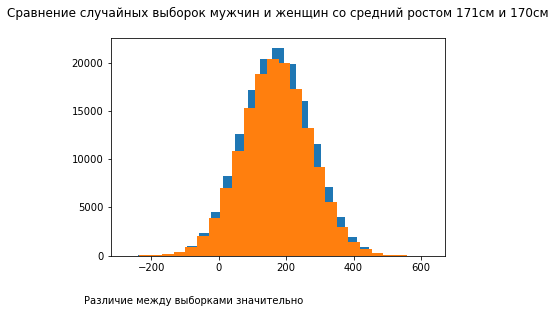

In [3]:
#Задание № 2

'''Даны две выборки роста мужчин и женщин.

    Докажите, используя t-Тест Стьдента, что различие между выборками незначительно, 
    если уровень значимости равен 𝛼 = 0.001.
Покажите различия визуально'''

np.random.seed(42) #фиксация случайности

men  = st.norm.rvs(loc=171, scale=100, size=150000)  # Выборка мужчин со средним ростом 171
women = st.norm.rvs(loc=170, scale=100, size=150000)  # Выборка женщин со средним ростом 170

significance_level = 0.001
#В двух строчках выше генерируется две выбороки, где loc это среднее значение, а scale это дисперсия


t, p_value = st.ttest_ind(men, women, equal_var=False) #Критерий Стьюдента (t-test)

plt.title('Сравнение случайных выборок мужчин и женщин со средний ростом 171см и 170см\n')

plt.hist(men, bins=25)
plt.hist(women, bins=25) 

if p_value < significance_level:
    plt.text(-400, -5000,'Различие между выборками значительно')
    
st.ttest_ind(men, women, equal_var=False)

Поскольку полученное значение pvalue (~ 0.00025) ниже заданного уровня значимости 𝛼 (0.001), то нулевую гипотезу (в данном случае о статистически незначимом различии между рассматриваемыми выборками) следует отвергнуть и принять альтернативную гипотезу о значительности различий между рассматриваемыми выборками.

In [6]:
#Задание № 3

'''Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе 
если известно, что в этом городе:

    стандартное отклонение 𝜎=150;
    уровень доверия 𝛽 = 95%;
    Погрешность Δ=50 рублей.'''

standard_deviation = 150
confidence_level = 0.95
inaccuracy = 50
quantile = st.norm.ppf(0.5*(1+confidence_level))
size = ((quantile*standard_deviation)/inaccuracy)**2
print(round(size, 0))

35.0


In [7]:
#Задание № 4

'''Представьте, что вы хотите разоблачить "волшебника" который считает, 
что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. 
    Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени 
    и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? 
Уровень значимости принять за 0.05 (𝛼=0.05).'''

observations = pd.DataFrame([[10, 15],[39, 34]],
                            index=['Дождь','Солнце'],
                            columns=['Верные ответы волшебника','Неверные ответы'])
print(observations)


# Учтите, что у стат. тестов, в том числе и точного теста Фишера под нулевой гипотезой 
#подразумевается случайность/отсутствие эффекта

oddsratio, pvalue = st.fisher_exact(observations)

oddsratio, pvalue


        Верные ответы волшебника  Неверные ответы
Дождь                         10               15
Солнце                        39               34


(0.5811965811965812, 0.35417955365927367)

Поскольку pvalue (0.35) выше принятого уровня значимости 𝛼 (0.05), то оснований отвергать нулевую гипотезу о случайности предсказаний погоды нет.

In [24]:
#Задание № 5

'''Используя функцию mean_confidence_interval(data, confidence), 
постройте доверительный интервал с уровнем доверия 𝛽=90%
для выборки:'''
    
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

#plt.hist(data, bins=25)#посмотрим на выборку

def mean_confidence_interval(data, confidence):
    n = len(data)
    m, se = np.mean(data), st.sem(data)
    h = se * st.t.ppf((1 + confidence)/2, n)  
    return m-h, m+h 



mean_confidence_interval(data, confidence=0.90)



(6.074074746111319, 7.183068111031539)

t_value: 11.803253652222743 _pvalue:  1.3216865332483862e-24


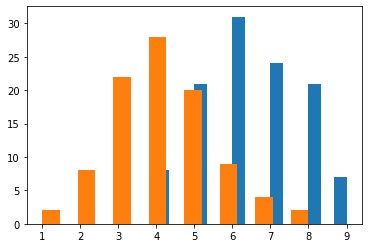

In [15]:
#Задание № 6

'''Принадлежат ли выборки A и B одному множеству?

    Оцените это с помощью известных вам тестов для проверок статистических гипотез;
    Покажите различия визуально.
'''
A = [4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4]

B = [5,6,7,8,4,6,7,2,6,5,7,5,3,5,3,
    5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    3,4,4,1,2,4,3,2,4,3,2,1,5,3,4,6,
    3,2,4,5,6,4,3,3,5,3,4,4,4,2,5,3]
 

#Ваш код:
tvalue, pvalue = st.ttest_ind(A, B, equal_var=False)

print('t_value:',tvalue, '_pvalue: ',pvalue)

plt.hist(A, bins=15);
plt.hist(B, bins=15);



Выборки А и В принадлежат одному множеству, поскольку значение pvalue ниже общепринятого уровня значимости 0.05, то есть основания отвергнуть нулевую гипотезу (в данном случае о принадлежности выборок разным множествам).

In [ ]:
#Задание № 7 (задание без подвоха)

'''На примере датасета про жилье в New York City, мы сталкивались с примером, 
когда переменная имеет не совсем нормальное распределение.

    Предположим, Вы сформировали две гипотезы:
        нулевая гипотеза - распределение нормальное;
        альтернативная гипотеза - распределение ненормальное.
допустим, вы применили какой-то тест (сейчас неважно какой), 
который показал уровень значимости p-value = 0.03. 
Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)'''



Распределение ненормальное, поскольку если сравнивать с общепринятым стандартным уровнем значимости 5%, 
то нулевую гипотезу (в данном случае, что распределение нормальное) необходимо отвергнуть

Ttest_indResult(statistic=-1.95300880485141, pvalue=0.051284961272800134)

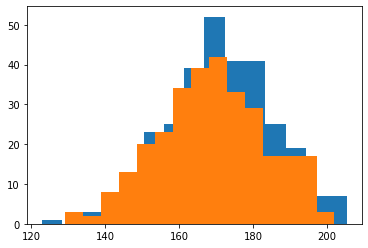

In [22]:
#Задание № 8

'''Первая выборка — это пациенты, которых лечили препаратом А. Вторая выборка — пациенты, которых лечили препаратом B.

Значения в выборках — это некоторая характеристика эффективности лечения 
(уровень метаболита в крови, температура через три дня после начала лечения, 
 срок выздоровления, число койко-дней, и т.д.)

Требуется выяснить, имеется ли значимое различие эффективности препаратов А и B, 
или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики? 
(уровень значимости принять за 0.05 (5%))

При каком минимальном p-value различия были бы уже значимы?

Если выборки незначительно отличаются, то продемонстрируйте это визуально'''

np.random.seed(11)
A = st.norm.rvs(scale=15, loc=169, size=300)
B = st.norm.rvs(scale=14, loc=171.4, size=300)

plt.hist(B, bins=15);
plt.hist(A, bins=15);



st.ttest_ind(A, B, equal_var=False)

# Подсказка, обратите внимание на Two-sample T-test

Поскольку значение pvalue(0.051) выше общепринятого стандартного уровня значимости (0.05), то есть основание принять нулевую гипотезу о случайном характере различий между выборками, т.е. об их статистической незначимости. 
Различия станут статистически значимыми уже при pvalue = 0.050 и ниже